# Task - 5 Sales Prediction With Machine Learning

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [46]:
df=pd.read_csv("sales.csv")

# Basic Understanding Of Data

In [47]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [49]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [50]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


# Exploratory Data Analysis

In [53]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


1. Visualizing Target Variable ['Sales']

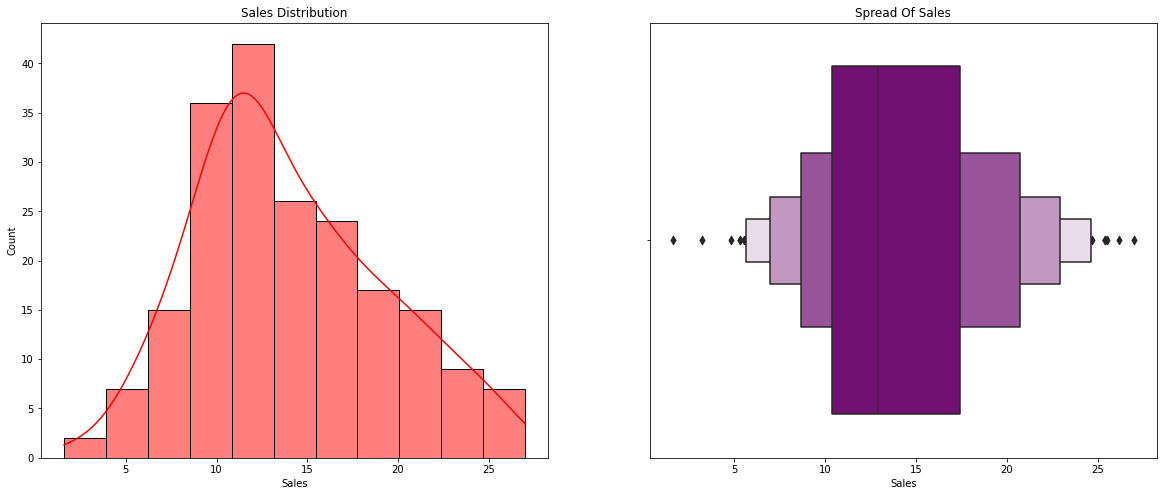

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Sales Distribution")
sns.histplot(data=df,x='Sales',kde=True, color= "red")

plt.subplot(1,2,2)
plt.title("Spread Of Sales")
sns.boxenplot(data=df,x='Sales', color="Purple")
plt.show()

Insights

Most of the sales values are between 8-20.

Formed bell shaped curve.



2 visualize TV vs SALES Features 

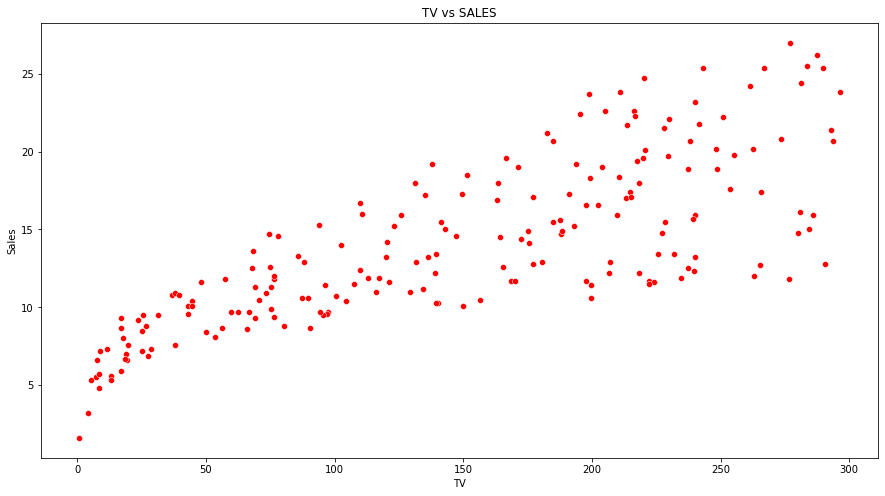

In [55]:
plt.figure(figsize=(15,8))
plt.title("TV vs SALES")
sns.scatterplot(df['TV'],df['Sales'],data=df,color="red")
plt.show()

Inshights:

In TV vs Sales Visualization we can clearly see that sales is highly dependent on TV Advertisment

3 visualize Radio vs SALES Features

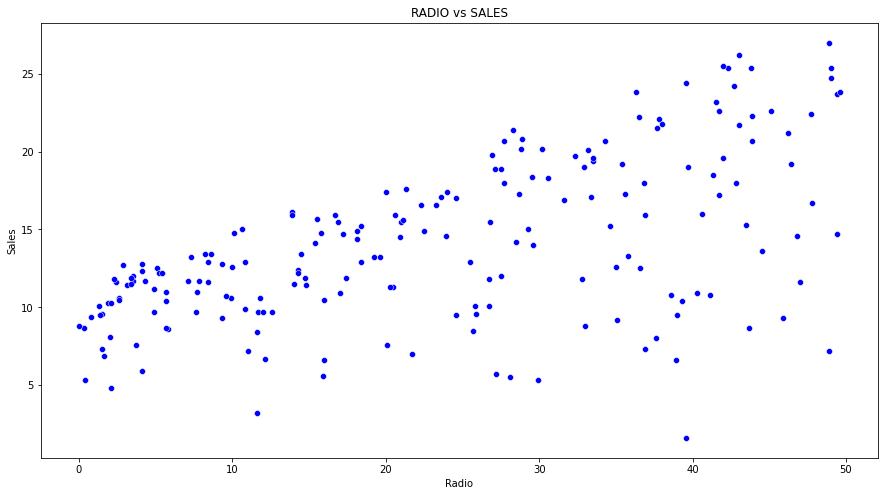

In [56]:
plt.figure(figsize=(15,8))
plt.title("RADIO vs SALES")
sns.scatterplot(df['Radio'],df['Sales'],data=df,color="blue")
plt.show()

Insights 

In Radio vs Sales Visualization we can say that sales is also dependent on Radio Advertisment but less dependency than TV Advertisment.

3 visualize NEWSPAPER vs SALES Features

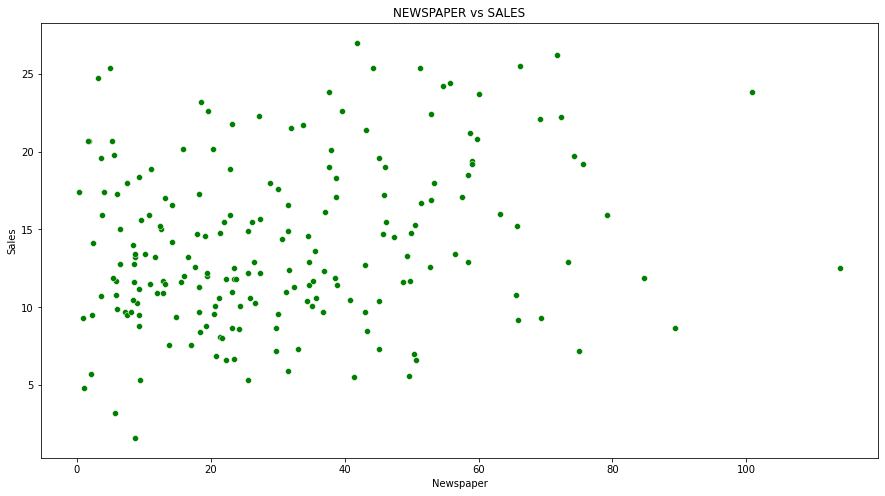

In [57]:
plt.figure(figsize=(15,8))
plt.title("NEWSPAPER vs SALES")
sns.scatterplot(df['Newspaper'],df['Sales'],data=df,color="green")
plt.show()

Insights

In Newspaper vs Sales Visualization we can clearly say that sales is not at all dependent on Newspaper Avdertisment because all the data-points are scattered and inconsistent.

# 4 Correlation between all features with target feature

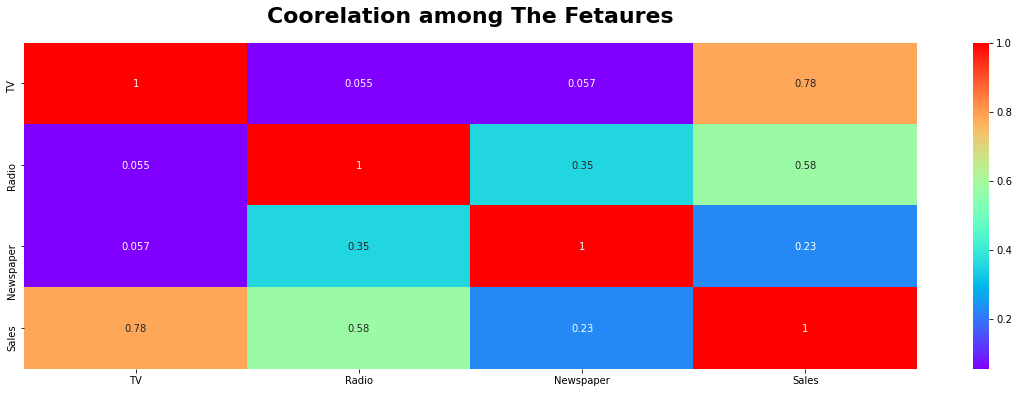

In [58]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.title("Coorelation among The Fetaures",fontweight="black",fontsize=22,pad=20)
plt.show()

Insights 

* you you clearly see that tv is highly correlated with sales

* also, radio is also high correlated with sales but less than Tv

* and newspaper having a less correlation with sales feature so we can't use it in model building

# Data Preprocessing

1. Selecting Label & Target For Model Training.

In [59]:
x = df.drop(columns=["Sales","Newspaper"])
y = df[["Sales"]]

2. Splitting Data For Model training & Tetsing.

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 2) (160, 1)
(40, 2) (40, 1)


# Model Creation

In [62]:
def model_pred(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100

    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [63]:
model_pred(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 89.55982149747163
r2_Score of LinearRegression() model on Testing Data is: 90.05833101920356


In [64]:
model_pred(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
r2_Score of DecisionTreeRegressor() model on Testing Data is: 96.14033177068121


In [65]:
model_pred(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 99.70286074027665
r2_Score of RandomForestRegressor() model on Testing Data is: 98.74491256243596


In [66]:
model_pred(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 97.5462827376263
r2_Score of AdaBoostRegressor() model on Testing Data is: 97.01368281501935


Insights

Highest performance was give by Random Forest Model around 98%.

But rest of the 3[linear regression, decision tree, adaboost] Model performance was also good.

So we can use any of these three Models for predicting the price of car in future.

So we can conclude that our model is having a kind of best fitting.